In [66]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cv_utils import *

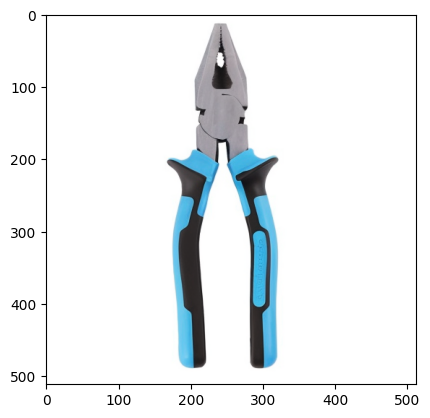

In [67]:
image_path = r"C:\Users\wnxxxxxx\computer_vision\thesis\data\datasets\generated_datasets\diffusion_models\image(1).png"
image = cv2.imread(image_path)
plt.imshow(image)

### Calculating Percentage of White Pixels

In [33]:
def calculate_percentage_white_pixels(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to binarize the image (assuming white is foreground)
    _, binary = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)

    # Count the number of white pixels
    num_white_pixels = cv2.countNonZero(binary)

    # Calculate the total number of pixels in the image
    total_pixels = image.shape[0] * image.shape[1]

    # Calculate the percentage of white pixels
    percentage_white_pixels = (num_white_pixels / total_pixels) * 100

    return percentage_white_pixels

percentage_white = calculate_percentage_white_pixels(image)
print("Percentage of white pixels:", percentage_white)

Percentage of white pixels: 83.96644592285156


### Invert image if white pixels dominate other colors

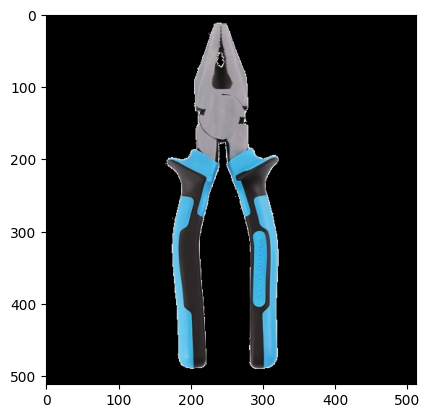

In [34]:
def invert_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary mask
    _, mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)
    
    # Invert the binary mask
    mask = cv2.bitwise_not(mask)
    inverted_image = cv2.bitwise_and(image, image, mask=mask)
    return inverted_image

image = invert_image(image)
plt.imshow(image)

### Finding Bounding Boxes

In [35]:
def find_bounding_box(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to create a binary image
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the maximum area (largest object)
    max_contour = max(contours, key=cv2.contourArea)

    # Find the minimum area bounding rectangle for the contour
    rect = cv2.minAreaRect(max_contour)

    # Get the four corner points of the rectangle
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Calculate the bounding box (x, y, w, h)
    x, y, w, h = cv2.boundingRect(box)

    return x, y, w, h

# Example usage:
x, y, w, h = find_bounding_box(image)
print("Bounding Box (x, y, w, h):", x, y, w, h)

Bounding Box (x, y, w, h): 167 12 155 479


C:\Users\wn00217454\AppData\Local\Temp\ipykernel_16704\1068818452.py:19: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


### Contour Detection and Visualization in Images

In [43]:
def find_contours(image):
    raw_image = remove_noise(image)

    grey = cv2.cvtColor(raw_image, cv2.COLOR_BGRA2GRAY)
    _, binary_image = cv2.threshold(grey, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    return contours

def draw_contours(image, contours, color=(0, 255, 0), thickness=2):
    """
    Draw contours on the input image.
    
    Parameters:
        image: Input image.
        contours: List of contours obtained from cv2.findContours().
        color: Contour color. Default is green (0, 255, 0).
        thickness: Contour thickness. Default is 2.
        
    Returns:
        Image with contours drawn on it.
    """
    
    # Make a copy of the input image to avoid modifying the original image
    image_with_contours = image.copy()
    
    # Draw contours on the image
    cv2.drawContours(image_with_contours, contours, -1, color, thickness)
    plt.imshow(image_with_contours)

def draw_rectangle(image, rect_color = (0, 255, 0), font = 5):
    contours = find_contours(image)
    biggest_contour = max(contours, key = cv2.contourArea)
    
    image_copy = image.copy()
    result_image = draw_rotated_rectangle(image_copy, biggest_contour, rect_color, font)
    plt.imshow(result_image)

def draw_convex_hull(image, rect_color = (0, 255, 0), font = 5):
    contours = find_contours(image)
    biggest_contour = max(contours, key = cv2.contourArea)

    image_copy = image.copy()
    hull = cv2.convexHull(biggest_contour)
    cv2.polylines(image_copy, [hull], True, (0,0,255), 2)
    #plt.imshow(image_copy)
    return hull

def draw_height_width_of_hull(hull):
    rotated_hull, center = rotate_to_horizontal(hull)
    #print(rotated_hull)
    width, height, vertices = find_length_and_width(rotated_hull)
    plot_hull_with_dimensions(rotated_hull, width, height, vertices)
    return rotated_hull, width, height, center

def draw_cropped_hull(image, rect_color = (0, 255, 0), font = 5):
    hull = draw_convex_hull(image, rect_color, font)
    #print(hull)
    rotated_hull, width, height, center = draw_height_width_of_hull(hull)
    return rotated_hull, width, height, center

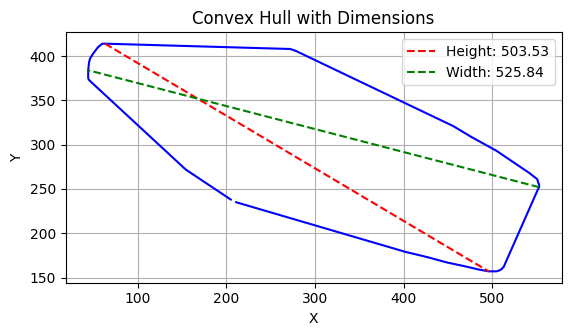

In [44]:
rotated_hull, width, height, center = draw_cropped_hull(image)
#rotated_hull

### Visualising Binary Image

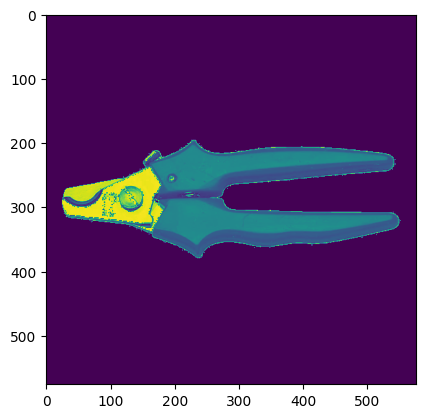

In [45]:
raw_image = image.copy()
grey = cv2.cvtColor(raw_image, cv2.COLOR_BGRA2GRAY)
plt.imshow(grey)

### Noise Removal

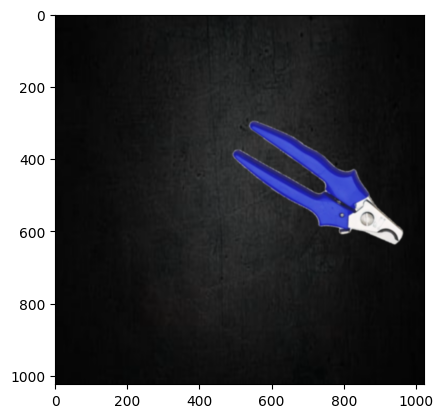

In [5]:
def remove_noise(image):
    # Apply any noise removal techniques here, such as blurring or morphological operations
    # For example:
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    denoised = cv2.morphologyEx(blurred, cv2.MORPH_OPEN, (3, 3))  # Opening operation to remove small objects
    
    return denoised

denoised = remove_noise(image)
plt.imshow(remove_noise(denoised))

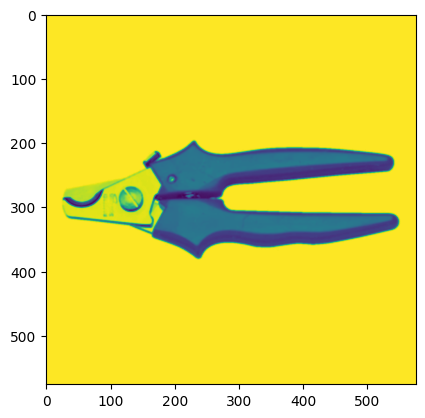

In [22]:
denoised = remove_noise(grey)
plt.imshow(denoised)

In [46]:
contours = find_contours(image)
#contours = find_contours(denoised)

In [47]:
# Find the areas of all contours
areas = [cv2.contourArea(contour) for contour in contours]

# Sort the contours based on their areas in descending order
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# The biggest contour is the first element
biggest_contour = sorted_contours[0]

# The second biggest contour is the second element, and so on
second_biggest_contour = sorted_contours[1]
third_biggest_contour = sorted_contours[2]

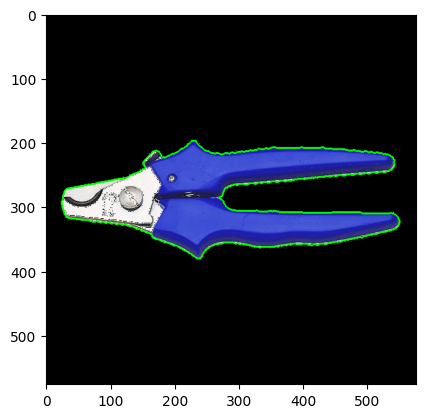

In [48]:
img = draw_contours(image, biggest_contour)

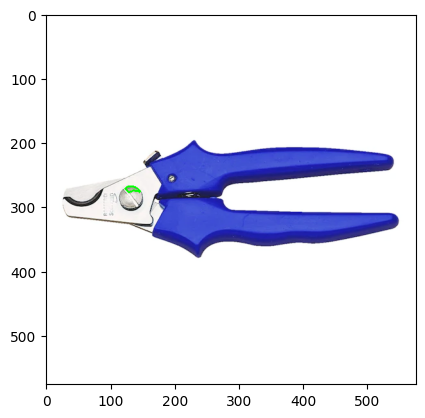

In [28]:
img = draw_contours(image, sorted_contours[4])

In [77]:
width, height, center

(526.0465758846834, 184.53184007102948, (700.9375, 453.8125))

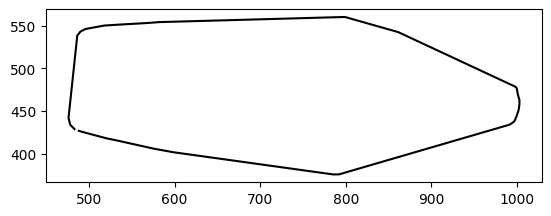

In [12]:
# Plot convex hull
plt.plot(rotated_hull[:, 0], rotated_hull[:, 1], 'k-')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Eclipse Guide

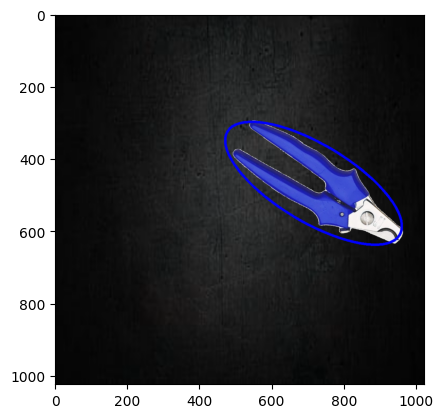

In [186]:
center_coordinates = (int(center[0]) + 15, int(center[1]) + 15)
  
axesLength = (int(width / 2) + 15, int(height /  2) + 15)
  
angle = 31
  
startAngle = 0

endAngle = 360
   
# Red color in BGR
color = (0, 0, 255)
   
# Line thickness of 5 px 
thickness = 5
   
# Using cv2.ellipse() method 
# Draw a ellipse with red line borders of thickness of 5 px
image = cv2.ellipse(image, center_coordinates, axesLength,
           angle, startAngle, endAngle, color, thickness)
plt.imshow(image)

### Using Rectangles

C:\Users\wn00217454\AppData\Local\Temp\ipykernel_32552\3857701711.py:29: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


(991.0, 847.0, 991.0, 847.0, (423.5, 495.5), 90.0)

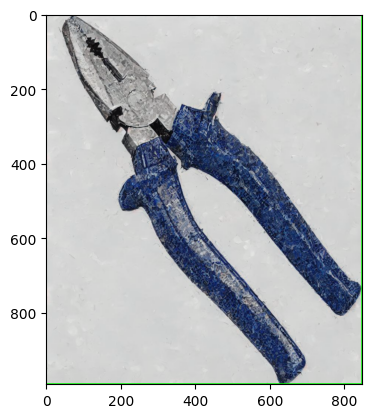

In [277]:
def get_rotated_rectangle_dimensions(image, contour):

    temp_img = image.copy()
    
    # Find minimum area bounding rectangle
    rect = cv2.minAreaRect(contour)

    # Get dimensions of the rectangle
    width = rect[1][0]
    height = rect[1][1]

    orig_width = rect[1][0]
    orig_height = rect[1][1]

    # Swap dimensions if necessary so that longer side is called length and shorter side is called width
    if width > height:
        length, width = width, height
    else:
        length, width = height, width

    # Get center of the rectangle
    center = rect[0]

    # Get angle
    angle = rect[2]

    # Draw rotated rectangle
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(temp_img, [box], 0, (0, 255, 0), 2)
    plt.imshow(temp_img)

    return length, width, orig_width, orig_height, center, angle

contours = find_contours(image)
biggest_contour = max(contours, key = cv2.contourArea)
l, w, orig_width, orig_height, center, angle = get_rotated_rectangle_dimensions(image, biggest_contour)
l, w, orig_width, orig_height, center, angle

In [75]:
def calculate_width_to_height_ratio(w, h):
    # Calculate the width-to-height ratio
    ratio = w / h
    return ratio

ratio = calculate_width_to_height_ratio(w, l)
print("Width-to-Height Ratio:", ratio)

Width-to-Height Ratio: 0.35159616089786405


In [67]:
def calculate_width_to_height_ratio(w, h):
    # Calculate the width-to-height ratio
    ratio = w / h
    return ratio

ratio = calculate_width_to_height_ratio(w, l)
print("Width-to-Height Ratio:", ratio)

Width-to-Height Ratio: 0.3521044380512412


In [54]:
rect = cv2.minAreaRect(biggest_contour)
rect

((284.9217529296875, 284.08111572265625),
 (183.52804565429688, 521.9853515625),
 85.13549041748047)

In [55]:
rect[2]

85.13549041748047

### Practicing to generate eclipse for the specific mask

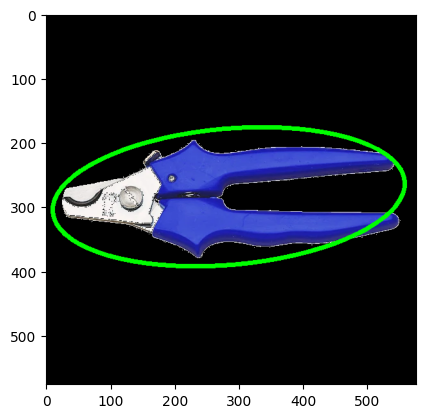

In [101]:
center_coordinates = (int(center[0]), int(center[1]))
  
axesLength = (int(orig_width / 2) + 15, int(orig_height / 2) + 15)
  
#angle = 31
angle = 85
  
startAngle = 0

endAngle = 360
   
# Red color in BGR
color = (0, 255, 0)
   
# Line thickness of 5 px 
thickness = 5
   
# Using cv2.ellipse() method 
# Draw a ellipse with red line borders of thickness of 5 px
image = cv2.ellipse(image, center_coordinates, axesLength,
           angle, startAngle, endAngle, color, thickness)
plt.imshow(image)

### Get Eclipse Mask of the Object

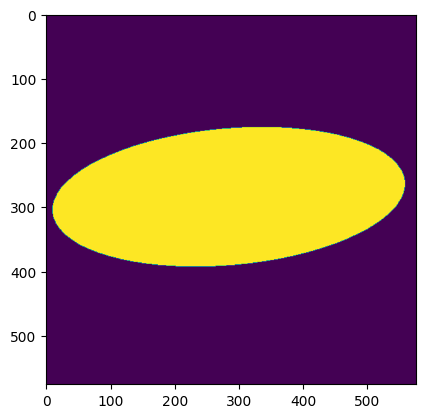

In [76]:
def draw_ellipse_mask(image, center_coordinates, axesLength, angle, startAngle, endAngle, color, thickness=-1):
    # Create a blank mask image
    mask = np.zeros_like(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))

    # Draw the ellipse on the mask
    mask = cv2.ellipse(mask, center_coordinates, axesLength, angle, startAngle, endAngle, color, thickness).astype(np.bool_)

    return mask

mask = draw_ellipse_mask(image, center_coordinates, axesLength, angle, startAngle, endAngle, (225, 225, 225), thickness=-1)
plt.imshow(mask)

In [ ]:
def get_ellipse_mask_from_rect(image):
    contours = find_contours(image)
    biggest_contour = max(contours, key = cv2.contourArea)
    w, h, center = get_rotated_rectangle_dimensions(image, biggest_contour)

    center_coordinates = (int(center[0]), int(center[1]))
  
    axesLength = (int(w / 2) + 15, int(h / 2) + 15)
      
    angle = 31
      
    startAngle = 0
    
    endAngle = 360
       
    # Red color in BGR
    color = (0, 255, 0)
       
    # Line thickness of 5 px 
    thickness = 5

image.dtype :  uint8
coordinates =  478.0 154.0 478.0 154.0 (244.0, 251.0) 90.0
coordinates =  (254, 92) (244, 251) 90.0 0 360 (0, 255, 0) 5


73871

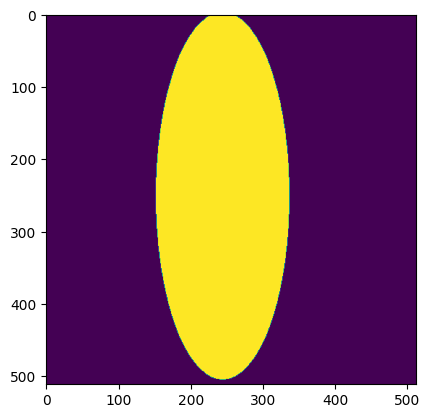

In [23]:
def orig_image_mask(image):
    percentage_white = calculate_percentage_white_pixels(image)
    if percentage_white > 50:
        image = invert_image(image)
        
    contours = find_contours(image)
    biggest_contour = max(contours, key = cv2.contourArea)
    l, w, orig_width, orig_height, center, angle = get_rotated_rectangle_dimensions(image, biggest_contour)
    print("image.dtype : ", image.dtype)
    print("coordinates = ", l, w, orig_width, orig_height, center, angle)
    center_coordinates = (int(center[0]), int(center[1]))
  
    axesLength = (int(orig_width / 2) + 15, int(orig_height / 2) + 15)
      
    startAngle = 0
    endAngle = 360
       
    # Red color in BGR
    color = (0, 255, 0)
       
    # Line thickness of 5 px 
    thickness = 5
       
    # Using cv2.ellipse() method 
    # Draw a ellipse with red line borders of thickness of 5 px
    print("coordinates = ", axesLength, center_coordinates, angle, startAngle, endAngle, color, thickness)
    image = cv2.ellipse(image, center_coordinates, axesLength,
               angle, startAngle, endAngle, color, thickness)
    
    mask = draw_ellipse_mask(image, center_coordinates, axesLength, angle, startAngle, endAngle, (225, 225, 225), thickness=-1)
    plt.imshow(mask)
    return mask, l, w

mask, l, w = orig_image_mask(image)
np.count_nonzero(mask)

### Find Object Rectangle

In [7]:
def generate_rect_mask(image_shape, center, width, height, angle):
    # Create blank mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)
    
    # Draw rotated rectangle on mask
    rect = ((center[0], center[1]), (width, height), angle)
    box = cv2.boxPoints(rect).astype(np.int0)
    cv2.drawContours(mask, [box], 0, (255), -1)
    
    return mask

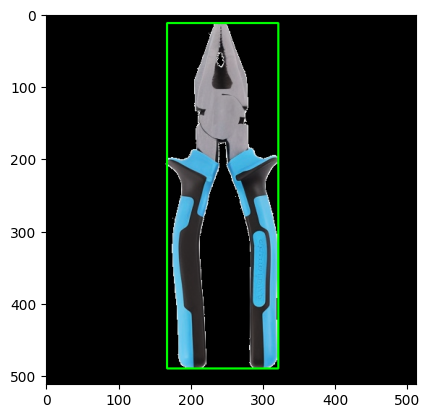

In [71]:
percentage_white = calculate_percentage_white_pixels(image)
if percentage_white > 50:
    image = invert_image(image)
    
contours = find_contours(image)
biggest_contour = max(contours, key = cv2.contourArea)
l, w, orig_width, orig_height, center, angle = get_rotated_rectangle_dimensions(image, biggest_contour)

C:\Users\wn00217454\AppData\Local\Temp\ipykernel_16704\3793433270.py:7: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = cv2.boxPoints(rect).astype(np.int0)


(74724, <matplotlib.image.AxesImage at 0x22db022e290>)

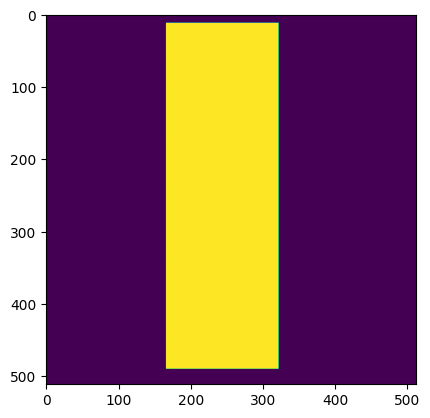

In [41]:
mask = generate_rect_mask(image.shape, center, l, w, angle)
np.count_nonzero(mask), plt.imshow(mask)

In [36]:
l, w

(478.0, 155)

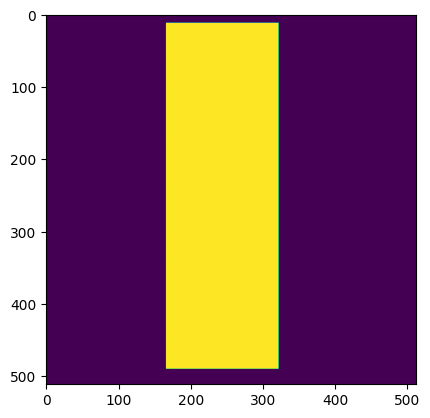

In [63]:
plt.imshow(mask)

In [69]:
def find_obj_rect(image):
    percentage_white = calculate_percentage_white_pixels(image)
    if percentage_white > 50:
        image = invert_image(image)
        
    contours = find_contours(image)
    biggest_contour = max(contours, key = cv2.contourArea)
    l, w, orig_width, orig_height, center, angle = get_rotated_rectangle_dimensions(image, biggest_contour)
    return (l, w, orig_width, orig_height, center, angle)

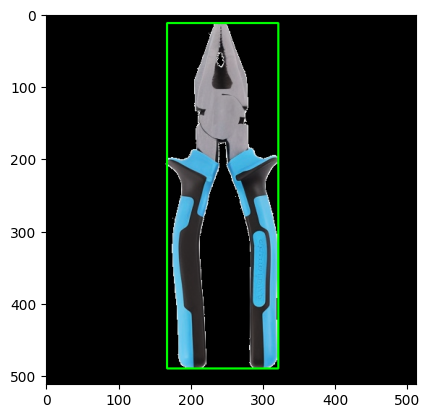

In [70]:
(l, w, orig_width, orig_height, center, angle) = find_obj_rect(image)

### Get Length to Width Ratio of the Object

In [37]:
def length_to_width_ratio(image):
    percentage_white = calculate_percentage_white_pixels(image)
    if percentage_white > 50:
        image = invert_image(image)
        
    contours = find_contours(image)
    biggest_contour = max(contours, key = cv2.contourArea)
    l, w, orig_width, orig_height, center, angle = get_rotated_rectangle_dimensions(image, biggest_contour)
    ratio = w / l
    return ratio

0.3747534516765286

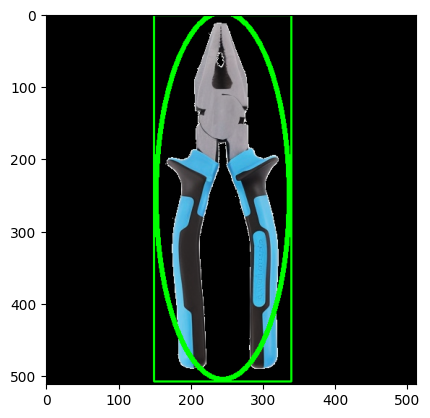

In [64]:
length_to_width_ratio(image)

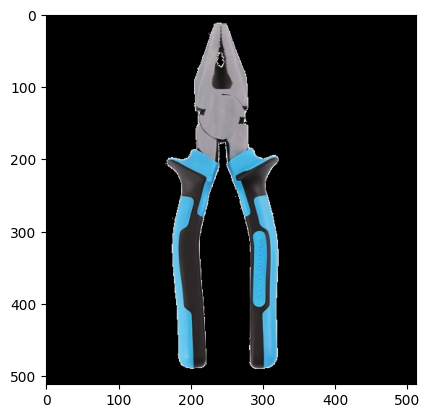

In [42]:
plt.imshow(image)

Object not found in generated image
True III
Loss = 1


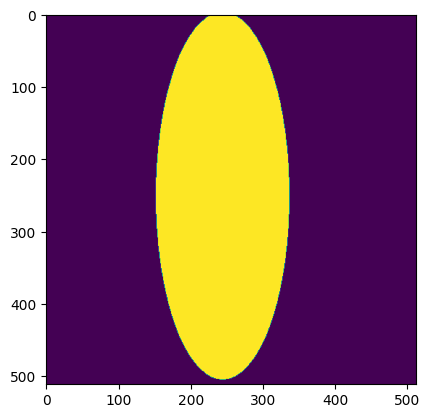

In [48]:
def get_loss(image, image_gen, conf = 0.03, threshold = 40):
    loss = 0
    orig_img_mask, l, w = orig_image_mask(image)
    gen_img_mask = find_object_mask(image, orig_img_mask, image_gen, threshold = 40)
    
    if gen_img_mask is not None:
        image_length, image_width = find_object_dimensions(mask.astype("uint8"))
        image_gen_length, image_gen_width = find_object_dimensions(gen_img_mask.astype("uint8"))
        image_ratio = calculate_width_to_height_ratio(image_width, image_length)
        image_gen_ratio = calculate_width_to_height_ratio(image_gen_width, image_gen_length)
        print(image_ratio, image_gen_ratio)
        if (image_ratio <= (image_gen_ratio + conf)) and (image_ratio >= (image_gen_ratio - conf)):
            print("True I")
            return loss
        else:
            print("True II")
            loss += abs(image_gen_ratio - image_ratio)
            return loss
    else:
        print("True III")
        return 1


loss = get_loss(image, image_gen, 0.03, 10)
print(f"Loss = {loss}")

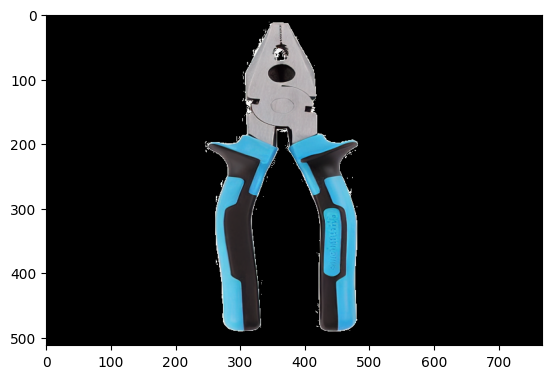

### Object Existence

In [131]:
def object_present_in_generated(masked_object, generated_image):
    # Convert the masked object to grayscale
    masked_gray = cv2.cvtColor(masked_object, cv2.COLOR_BGR2GRAY)

    # Convert the generated image to grayscale
    generated_gray = cv2.cvtColor(generated_image, cv2.COLOR_BGR2GRAY)

    # Perform template matching
    result = cv2.matchTemplate(generated_gray, masked_gray, cv2.TM_CCOEFF_NORMED)

    # Set a threshold for the matching score
    threshold = 0.8

    # Find the location of the maximum matching score
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Check if the maximum matching score is above the threshold
    object_present = max_val >= threshold

    return object_present

# Check if the object is present in the generated image
is_object_present = object_present_in_generated(image, image_gen)

if is_object_present:
    print("Object is present in the generated image")
else:
    print("Object is not present in the generated image")

Object is not present in the generated image


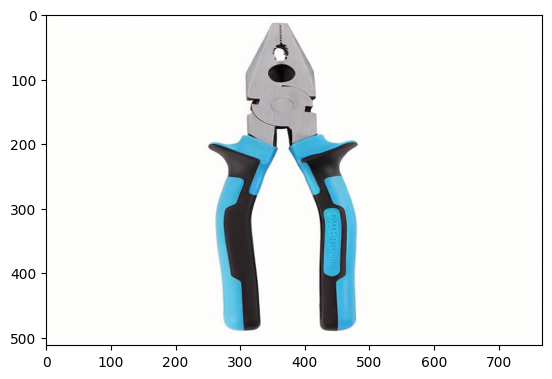

In [53]:
image_path = r"C:\Users\wnxxxxxx\computer_vision\thesis\data\datasets\generated_datasets\diffusion_models\image02.png"
image_gen = cv2.imread(image_path)
if calculate_percentage_white_pixels(image_gen) >= 50:
    image_gen = invert_image(image_gen)
plt.imshow(image_gen)

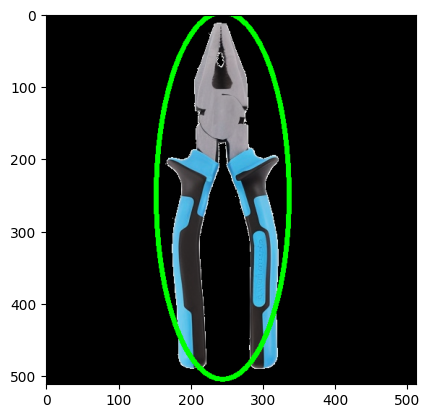

In [54]:
plt.imshow(image)

### Finding Object Locations in Images with ORB and Brute-Force Matching

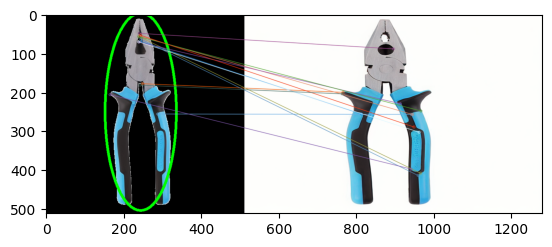

In [60]:
def find_object_location(original_image, generated_image, threshold = 80):
    # Convert images to grayscale
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    generated_gray = cv2.cvtColor(generated_image, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors for both images
    kp1, des1 = orb.detectAndCompute(original_gray, None)
    kp2, des2 = orb.detectAndCompute(generated_gray, None)

    # Initialize Brute-Force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # List to store valid matches
    valid_matches = []

    # Filter valid matches based on threshold
    for match in matches:
        if match.distance < threshold:
            valid_matches.append(match)

    # If enough valid matches found, object is present
    if len(valid_matches) > 10:  # Adjust threshold as needed
        # Draw matches
        img_matches = cv2.drawMatches(original_image, kp1, generated_image, kp2, valid_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        # Display matches
        plt.imshow(img_matches)
    else:
        print("Object not found in generated image")

# Find object location in generated image
find_object_location(image, image_gen, 47)

In [ ]:
def find_object_mask(original_image, original_mask, generated_image, threshold = 40):
    # Convert images to grayscale
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    generated_gray = cv2.cvtColor(generated_image, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors for both images
    kp1, des1 = orb.detectAndCompute(original_gray, None)
    kp2, des2 = orb.detectAndCompute(generated_gray, None)

    # Initialize Brute-Force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Define a threshold to consider a match as valid

    # List to store valid matches
    valid_matches = []

    # Filter valid matches based on threshold
    for match in matches:
        if match.distance < threshold:
            valid_matches.append(match)

    # If enough valid matches found, object is present
    if len(valid_matches) > 10:  # Adjust threshold as needed
        # Extract matched keypoints
        src_pts = np.float32([kp1[m.queryIdx].pt for m in valid_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in valid_matches]).reshape(-1, 1, 2)

        # Calculate homography
        H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Warp mask of object from original image to generated image
        mask_warped = cv2.warpPerspective(original_mask.astype(np.uint8), H, (generated_image.shape[1], generated_image.shape[0]))

        # Display or save the warped mask
        plt.imshow(mask_warped)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        return mask_warped
    else:
        print("Object not found in generated image")
        return None
    




# Find object mask in generated image
mask_gen = find_object_mask(image, mask, image_gen, 80)
if mask_gen is not None:
    print(mask_gen.dtype)

In [ ]:
def find_object_dimensions(mask):
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #contours = find_contours(mask)

    # Get the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Fit an ellipse to the contour
    ellipse = cv2.fitEllipse(largest_contour)

    # Plot the ellipse on the original image
    original_image = mask.copy()
    cv2.ellipse(original_image, ellipse, (0, 255, 0), 2)
    plt.imshow(original_image)

    # Extract major and minor axes lengths
    (center, axes, angle) = ellipse
    major_axis_length = max(axes)
    minor_axis_length = min(axes)

    return major_axis_length, minor_axis_length

# Find major and minor axis lengths
major_axis_length, minor_axis_length = find_object_dimensions(mask.astype("uint8"))
#major_axis_length, minor_axis_length = find_object_dimensions(image)

print("Major axis length:", major_axis_length)
print("Minor axis length:", minor_axis_length)

In [104]:
minor_axis_length / major_axis_length, w / l

(0.38534877467896705, 0.3527024175677679)

(520.1008911132812,
 183.4408416748047,
 <matplotlib.image.AxesImage at 0x1e876b7fb50>)

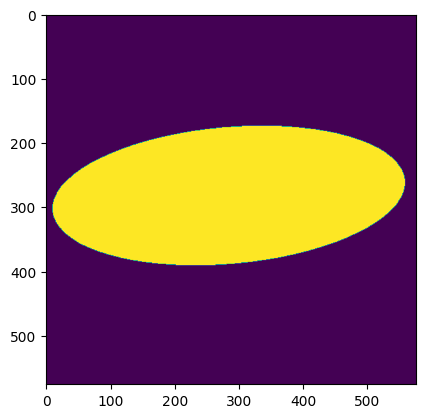

In [100]:
l, w, plt.imshow(mask)

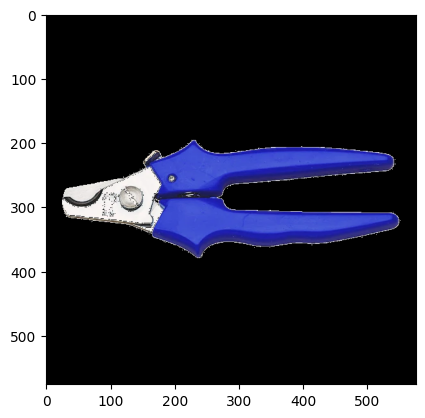

In [83]:
plt.imshow(image)

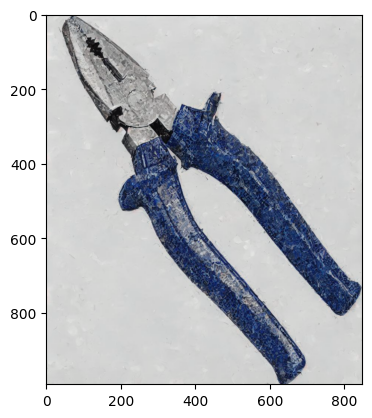

In [33]:
image_path = r"C:\Users\wnxxxxxx\computer_vision\thesis\data\datasets\google_dataset\generated\img.jpg"
image = cv2.imread(image_path)
#image = invert_image(image)
plt.imshow(image)

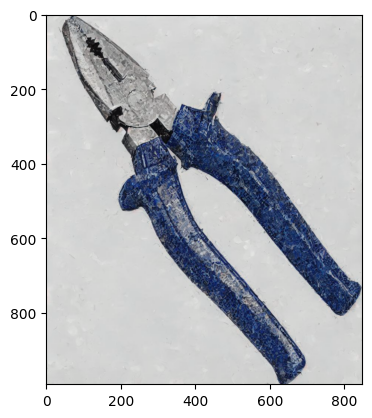

In [36]:
image_path = r"C:\Users\wn00xxxxxx\computer_vision\thesis\data\datasets\google_dataset\generated\img.jpg"
image_gen = cv2.imread(image_path)
if calculate_percentage_white_pixels(image_gen) >= 50:
    image_gen = invert_image(image_gen)
plt.imshow(image_gen)

In [44]:
# Find object location in generated image
find_object_location(image, image_gen, 35)

Object not found in generated image


C:\Users\wn00217454\AppData\Local\Temp\ipykernel_32552\3857701711.py:29: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


Object not found in generated image
True III
Loss = 1


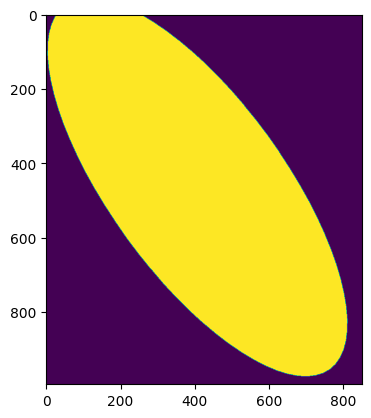

In [264]:
loss = get_loss(image, image_gen)
print(f"Loss = {loss}")